                                           name alpha_two_code state-province  \
0  Akademi Farmasi Mitra Sehat Mandiri Sidoarjo             ID        Unknown   
1            Institut Sains & Teknologi Akprind             ID        Unknown   
2                       STMIK AMIKOM Yogyakarta             ID        Unknown   
3                        STIKES RS Anwar Medika             ID        Unknown   
4       Universitas Katolik Indonesia Atma Jaya             ID        Unknown   

                     domains                                web_pages  \
0         akfarmitseda.ac.id         [http://www.akfarmitseda.ac.id/]   
1              akprind.ac.id              [http://www.akprind.ac.id/]   
2               amikom.ac.id               [http://www.amikom.ac.id/]   
3  stikesrsanwarmedika.ac.id  [http://www.stikesrsanwarmedika.ac.id/]   
4             atmajaya.ac.id             [http://www.atmajaya.ac.id/]   

   name_length  name_word_count  
0           44                6  
1     

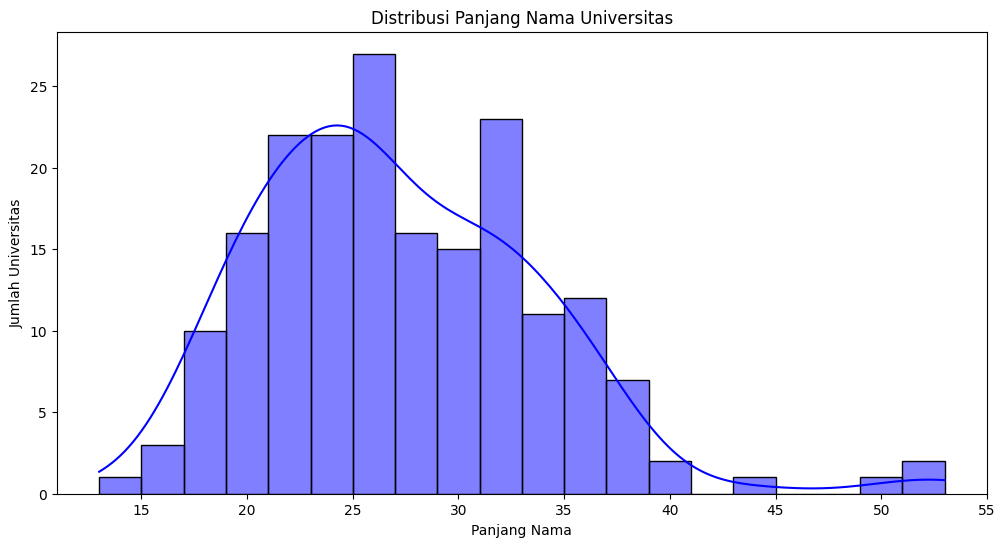


Jumlah Universitas Berdasarkan Provinsi:
state-province
Unknown    191
Name: count, dtype: int64


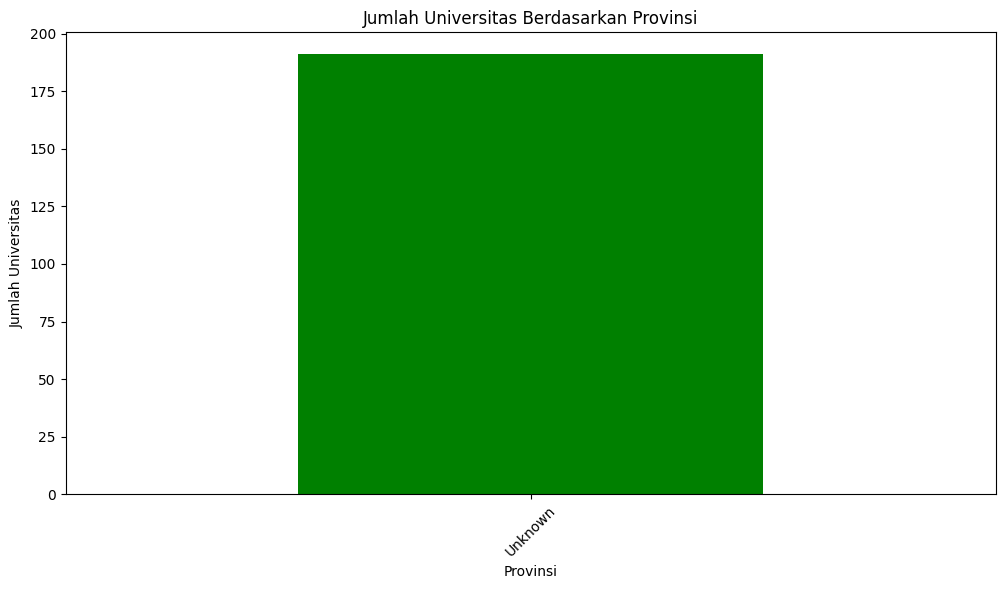


10 Domain Utama Universitas:
primary_domain
akfarmitseda.ac.id           1
akprind.ac.id                1
amikom.ac.id                 1
stikesrsanwarmedika.ac.id    1
atmajaya.ac.id               1
bakrie.ac.id                 1
binus.ac.id                  1
stikes-ppni.ac.id            1
bunghatta.ac.id              1
dinus.ac.id                  1
Name: count, dtype: int64


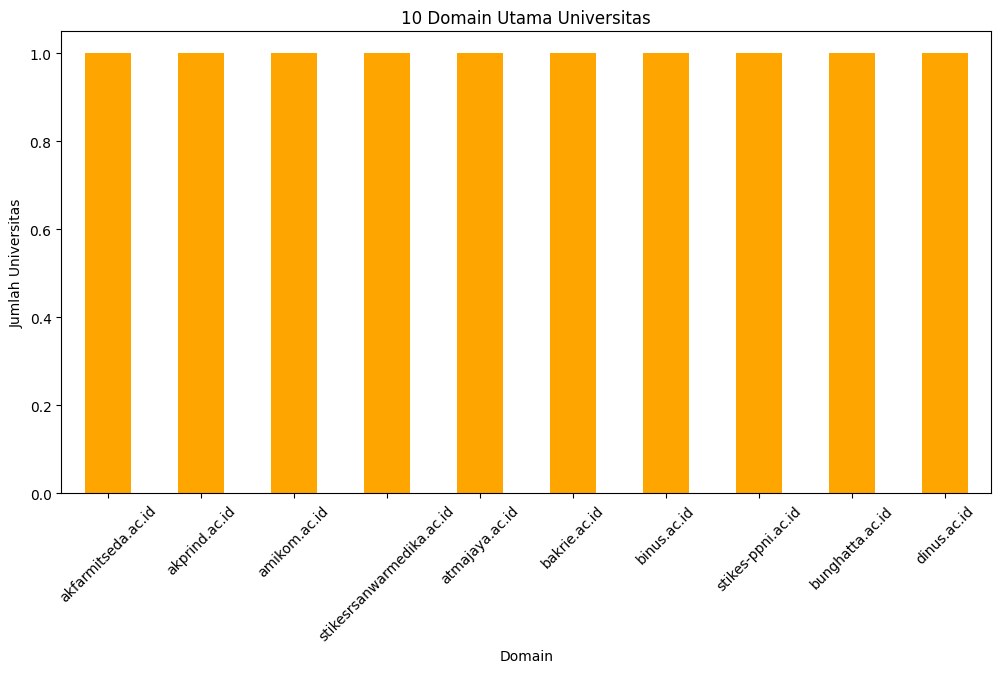

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

def extract() -> pd.DataFrame:
    API_URL = 'http://universities.hipolabs.com/search?country=Indonesia'
    data = requests.get(API_URL).json()
    df = pd.DataFrame(data)
    return df

# Extracting data
df = extract()

# 1. Pembersihan Data
# Hanya pilih kolom yang relevan
df = df[['name', 'alpha_two_code', 'state-province', 'domains', 'web_pages']]

# Mengganti nilai NaN dengan string kosong
df['state-province'] = df['state-province'].fillna('Unknown')
df['domains'] = df['domains'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')

# Menambah kolom panjang nama universitas
df['name_length'] = df['name'].apply(len)

# Menambah kolom jumlah kata dalam nama universitas
df['name_word_count'] = df['name'].apply(lambda x: len(x.split()))

# Menampilkan DataFrame
print(df.head())

# 2. Analisis Data

# Distribusi panjang nama universitas
plt.figure(figsize=(12, 6))
sns.histplot(df['name_length'], bins=20, kde=True, color='blue')
plt.title('Distribusi Panjang Nama Universitas')
plt.xlabel('Panjang Nama')
plt.ylabel('Jumlah Universitas')
plt.show()

# jumlah universitas berdasarkan provinsi
province_count = df['state-province'].value_counts()
print("\nJumlah Universitas Berdasarkan Provinsi:")
print(province_count)

# cisualisasi jumlah universitas berdasarkan provinsi
plt.figure(figsize=(12, 6))
province_count.plot(kind='bar', color='green')
plt.title('Jumlah Universitas Berdasarkan Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Universitas')
plt.xticks(rotation=45)  
plt.show()

# 3. Analisis domain email
df['primary_domain'] = df['domains']
domain_count = df['primary_domain'].value_counts().head(10)
print("\n10 Domain Utama Universitas:")
print(domain_count)

# Visualisasi 10 domain (utama) universitas
plt.figure(figsize=(12, 6))
domain_count.plot(kind='bar', color='orange')
plt.title('10 Domain Utama Universitas')
plt.xlabel('Domain')
plt.ylabel('Jumlah Universitas')
plt.xticks(rotation=45) 
plt.show()

# 4. Visualisasi Peta
map_center = [-2.548926, 118.0148634]  # Koordinat Indonesia
m = folium.Map(location=map_center, zoom_start=5)

# Karena tidak ada data koordinat universitas, kita hapus bagian ini atau Anda bisa menambahkan koordinat manual jika ada
# Menambahkan marker untuk setiap universitas (jika ada koordinat)
for idx, row in df.iterrows():
    folium.Marker([map_center[0], map_center[1]], tooltip=row['name']).add_to(m)

# Simpan peta sebagai HTML
m.save("indonesia_universities_map.html")
